In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils


batch_size = 128
num_classes = 10
epochs = 1

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(784,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 20)            15700       dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 20)            420         dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            210         dense_2[0][0]                    
Total params: 16330
____________________________________________________________________________________________________


Test loss: 0.295705702633
Test accuracy: 0.9188


In [5]:
pr = model.predict(x_test[0].reshape(1,784), batch_size=1, verbose=0)
print(pr)
print(y_test[0])

[[  8.71825207e-04   3.60779723e-06   9.89646651e-04   9.54491668e-04
    9.64986612e-06   5.83126930e-05   3.04994296e-06   9.95556533e-01
    1.60887095e-04   1.39201991e-03]]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


shamelessly stolen from

http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

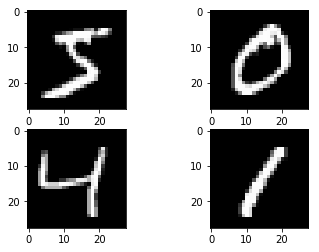

In [12]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [60]:
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [61]:
def baseline_model():
    model = Sequential()
    model.add(Dense(60, input_shape=(784,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
	
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = baseline_model()